In [3]:
# ### ANTES DE QUALQUER COISA, RODAR ESSA CÉLULA E REINICIAR O KERNEL. DEPOIS DISSO, COMENTAR TODO O CÓDIGO DESSA CÉLULA
# caminho = ".//venv//lib//site-packages//skopt//space//transformers.py"
# line_number_to_edit = 275
# with open(caminho, "r") as file:
#     lines = file.readlines()
#     lines[line_number_to_edit - 1] = lines[line_number_to_edit - 1].replace("np.int", "np.int32")

# # Escrever o conteúdo modificado de volta ao arquivo
# with open(caminho, "w") as file:
#     file.writelines(lines)

# line_number_to_edit = 262
# with open(caminho, "r") as file:
#     lines = file.readlines()
#     lines[line_number_to_edit - 1] = lines[line_number_to_edit - 1].replace("np.int", "np.int32")

# # Escrever o conteúdo modificado de volta ao arquivo
# with open(caminho, "w") as file:
#     file.writelines(lines)

In [4]:
import pandas as pd
dados = pd.read_csv('dados_unidade_3.csv')
dados.columns = [x.lower() for x in dados.columns]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
escalonar = dados.iloc[:,:10]
escalonar = pd.DataFrame(scaler.fit_transform(escalonar),columns=escalonar.columns)
escalonar['nox'] = dados['nox'].values
x = escalonar.iloc[:,:10].values
y = escalonar.iloc[:,10].values
from sklearn.model_selection import train_test_split, cross_val_score
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,train_size=0.8,random_state=3)

# Validação cruzada

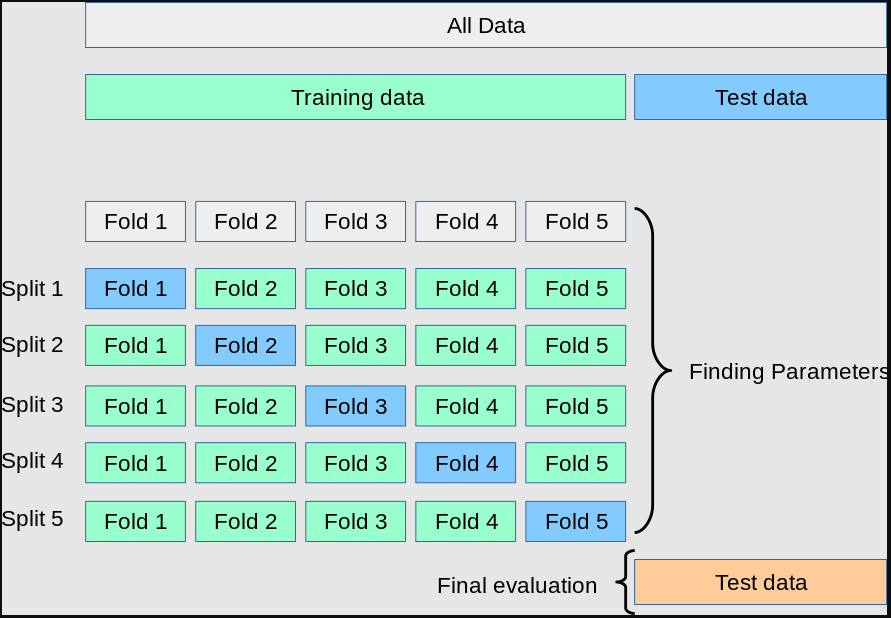

A validação cruzada é uma técnica utilizada em aprendizado de máquina para avaliar a capacidade de generalização de um modelo. Ela consiste em dividir o conjunto de dados em subconjuntos e realizar repetidos treinos e testes, garantindo que cada subconjunto seja usado como teste pelo menos uma vez.

## Objetivos:

* Estimar o desempenho do modelo: Ao avaliar o modelo em diferentes subconjuntos, obtém-se uma estimativa mais robusta de seu desempenho em dados não vistos.

* Reduzir o overfitting: A técnica proporciona uma visão mais realista da capacidade de generalização do modelo, uma vez que cada ponto de dados é usado tanto para treino quanto para teste.

* Utilizar os dados eficientemente: Em cenários com poucos dados, a validação cruzada permite maximizar o uso desses dados para treino e teste.

In [5]:
from sklearn.neighbors import KNeighborsRegressor
modelo = KNeighborsRegressor()
cross_val_scores = cross_val_score(modelo, x_treino, y_treino, cv=10, scoring='neg_mean_absolute_percentage_error',verbose=3)

[CV] END ............................... score: (test=-0.040) total time=   0.1s
[CV] END ............................... score: (test=-0.041) total time=   0.1s
[CV] END ............................... score: (test=-0.039) total time=   0.1s
[CV] END ............................... score: (test=-0.042) total time=   0.1s
[CV] END ............................... score: (test=-0.042) total time=   0.1s
[CV] END ............................... score: (test=-0.039) total time=   0.1s
[CV] END ............................... score: (test=-0.041) total time=   0.1s
[CV] END ............................... score: (test=-0.040) total time=   0.1s
[CV] END ............................... score: (test=-0.041) total time=   0.1s
[CV] END ............................... score: (test=-0.042) total time=   0.1s


In [6]:
mape_scores = -cross_val_scores
mape_scores

array([0.0404329 , 0.04052994, 0.03948074, 0.041796  , 0.04162714,
       0.03929934, 0.04053761, 0.03965039, 0.04112356, 0.04192543])

{'whiskers': [<matplotlib.lines.Line2D at 0x2422375a220>,
 'caps': [<matplotlib.lines.Line2D at 0x2422375a760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2422373ff40>],
 'medians': [<matplotlib.lines.Line2D at 0x2422375ab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2422375ae20>],
 'means': []}

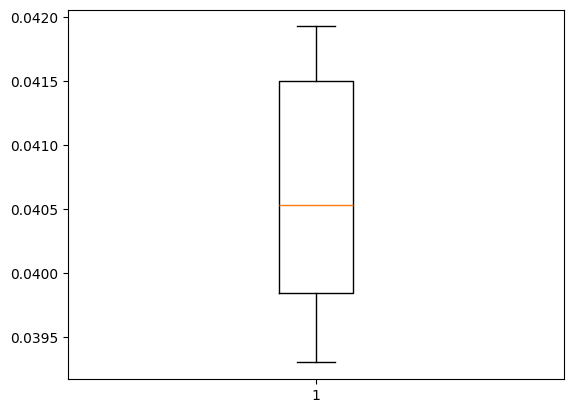

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(mape_scores)

In [8]:
modelo.fit(x_treino,y_treino)
y_prev = modelo.predict(x_teste)

In [9]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_teste,y_prev)
mape

0.039466576237921956

# Tunning automatizado de hiperparâmetros

O tuning de hiperparâmetros refere-se ao processo de ajustar os parâmetros de um algoritmo de aprendizado de máquina que não são aprendidos dos dados. Em vez de serem obtidos através do treinamento, esses parâmetros devem ser definidos antes do treinamento e podem ter um impacto significativo no desempenho do modelo.

## Objetivos do Tuning de Hiperparâmetros:

* Melhorar o Desempenho do Modelo: O objetivo principal do tuning de hiperparâmetros é encontrar a combinação que fornece o melhor desempenho do modelo em dados não vistos, seja maximizando métricas como precisão, R^2, etc., ou minimizando erros como o erro quadrático médio.

* Evitar Overfitting: Alguns hiperparâmetros, quando definidos de forma inadequada, podem fazer o modelo se ajustar demais aos dados de treinamento, resultando em má generalização para novos dados. Ajustando-os, podemos controlar a complexidade do modelo.

* Otimizar a Eficiência Computacional: Alguns hiperparâmetros podem afetar o tempo de treinamento ou a quantidade de memória necessária para treinar um modelo. O tuning pode ajudar a encontrar um equilíbrio entre desempenho e eficiência.

## Métodos Comuns de Tuning de Hiperparâmetros:

* Grid Search (Busca em Grade): Esse método envolve a especificação de um subconjunto de valores possíveis para cada hiperparâmetro de interesse e, em seguida, a avaliação de todas as combinações possíveis.

* Random Search (Busca Aleatória): Em vez de avaliar todas as combinações possíveis, a busca aleatória avalia conjuntos aleatórios de hiperparâmetros dentro de distribuições especificadas.

* Métodos Bayesianos: Estes são métodos mais sofisticados que usam probabilidade e estatísticas para prever quais combinações de hiperparâmetros são mais prováveis de alcançar o desempenho desejado.

* Otimização Baseada em Gradiente: Alguns algoritmos modernos utilizam derivadas para ajustar hiperparâmetros de maneira mais eficiente.

Ao final do processo de tuning, é essencial reavaliar o modelo usando a combinação ótima de hiperparâmetros em um conjunto de validação ou teste separado para garantir que a performance observada durante o tuning seja consistente em dados não visto

### GridSearchCV

O Grid Search CV é uma técnica de otimização de hiperparâmetros que examina sistematicamente todas as combinações possíveis de hiperparâmetros especificados para encontrar a combinação que produz o melhor desempenho do modelo.

O "CV" em Grid Search CV refere-se à validação cruzada (Cross-Validation). Durante o Grid Search, cada combinação de hiperparâmetros é avaliada usando validação cruzada para garantir que o desempenho do modelo seja robusto e não seja otimizado apenas para uma divisão particular dos dados.

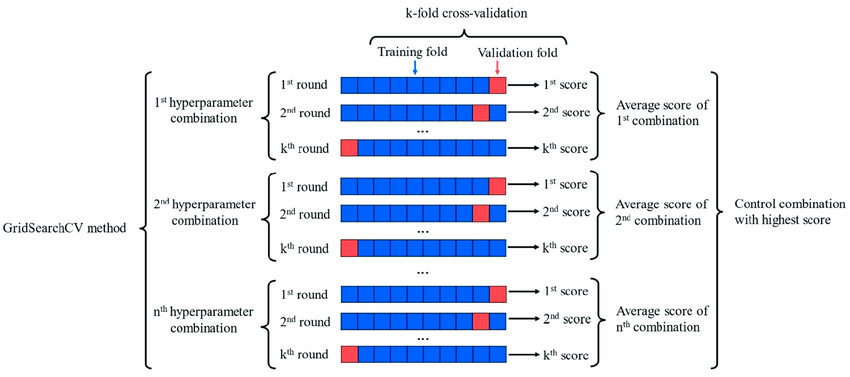


In [10]:
from sklearn.model_selection import GridSearchCV
modelo = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5],       # 2 níveis: 3 e 5 vizinhos
    'weights': ['uniform', 'distance'],  # 2 níveis: uniforme e baseado em distância
    'p': [1, 2]                  # 2 níveis: l1 (Manhattan) e l2 (Euclidiana)
}
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error',verbose=3)
grid_search.fit(x_treino,y_treino)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=-0.038 total time=   0.2s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=-0.038 total time=   0.2s
[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=-0.039 total time=   0.2s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=-0.038 total time=   0.2s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=-0.039 total time=   0.2s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=-0.037 total time=   0.2s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=-0.037 total time=   0.2s
[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=-0.037 total time=   0.2s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=-0.037 total time=   0.2s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=-0.038 total time=   0.2s
[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=-0.039 total time=   0.1s
[CV 2/5] END n_neighbo

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_percentage_error', verbose=3)

In [11]:
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [12]:
print("Melhor pontuação:", grid_search.best_score_)

Melhor pontuação: -0.03694899833851974


In [13]:
best_model = grid_search.best_estimator_
y_prev = best_model.predict(x_teste)
mape = mean_absolute_percentage_error(y_teste,y_prev)
mape

0.03463326977112872

### Multimétrica

In [14]:
modelo = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5],       # 2 níveis: 3 e 5 vizinhos
    'weights': ['uniform', 'distance'],  # 2 níveis: uniforme e baseado em distância
    'p': [1, 2]                  # 2 níveis: l1 (Manhattan) e l2 (Euclidiana)
}
scoring = {'MAPE': 'neg_mean_absolute_percentage_error', 'R2': 'r2'}
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring=scoring,verbose=3,refit='R2')
grid_search.fit(x_treino,y_treino)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=3, p=1, weights=uniform; MAPE: (test=-0.038) R2: (test=0.872) total time=   0.2s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform; MAPE: (test=-0.038) R2: (test=0.879) total time=   0.3s
[CV 3/5] END n_neighbors=3, p=1, weights=uniform; MAPE: (test=-0.039) R2: (test=0.866) total time=   0.2s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform; MAPE: (test=-0.038) R2: (test=0.876) total time=   0.2s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform; MAPE: (test=-0.039) R2: (test=0.874) total time=   0.2s
[CV 1/5] END n_neighbors=3, p=1, weights=distance; MAPE: (test=-0.037) R2: (test=0.880) total time=   0.3s
[CV 2/5] END n_neighbors=3, p=1, weights=distance; MAPE: (test=-0.037) R2: (test=0.886) total time=   0.2s
[CV 3/5] END n_neighbors=3, p=1, weights=distance; MAPE: (test=-0.037) R2: (test=0.873) total time=   0.2s
[CV 4/5] END n_neighbors=3, p=1, weights=distance; MAPE: (test=-0.037) R2: (test=0.883) t

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             refit='R2',
             scoring={'MAPE': 'neg_mean_absolute_percentage_error', 'R2': 'r2'},
             verbose=3)

In [15]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_MAPE,split1_test_MAPE,...,std_test_MAPE,rank_test_MAPE,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,mean_test_R2,std_test_R2,rank_test_R2
0,0.064688,0.003954,0.259290,0.029230,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",-0.038325,-0.037992,...,0.000451,4,0.872414,0.879278,0.866048,0.876430,0.873683,0.873570,0.004443,3
1,0.060472,0.002900,0.256972,0.028366,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",-0.036748,-0.036531,...,0.000434,1,0.879867,0.885834,0.872621,0.883081,0.881298,0.880540,0.004432,1
2,0.061289,0.001063,0.193447,0.007315,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",-0.039369,-0.039643,...,0.000383,7,0.870427,0.869259,0.856230,0.865092,0.863259,0.864853,0.005048,7
3,0.059606,0.001352,0.187439,0.004761,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",-0.037615,-0.038134,...,0.000416,3,0.878412,0.876145,0.863943,0.871538,0.871906,0.872389,0.004953,4
4,0.060740,0.002866,0.275617,0.005510,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",-0.039547,-0.039512,...,0.000476,6,0.867137,0.874395,0.869588,0.873387,0.864610,0.869824,0.003689,6
5,0.059293,0.000967,0.284059,0.022353,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",-0.037440,-0.037340,...,0.000413,2,0.877929,0.885083,0.879005,0.883261,0.875810,0.880218,0.003437,2
6,0.058682,0.001238,0.225442,0.010421,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",-0.041668,-0.041544,...,0.000349,8,0.861552,0.864662,0.853677,0.862168,0.854460,0.859304,0.004407,8
7,0.060579,0.001355,0.219808,0.006886,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",-0.039173,-0.039211,...,0.000288,5,0.874191,0.876882,0.865395,0.872215,0.866936,0.871124,0.004339,5


In [16]:
results.to_excel('resultados_gridsearchCV.xlsx')

In [17]:
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor pontuação:", grid_search.best_score_)

Melhores hiperparâmetros: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Melhor pontuação: 0.8805401139565552


In [18]:
best_model = grid_search.best_estimator_
y_prev = best_model.predict(x_teste)
from sklearn.metrics import r2_score
r2 = r2_score(y_teste,y_prev)
r2

0.8835536615657993

Text(0, 0.5, 'y Previsto')

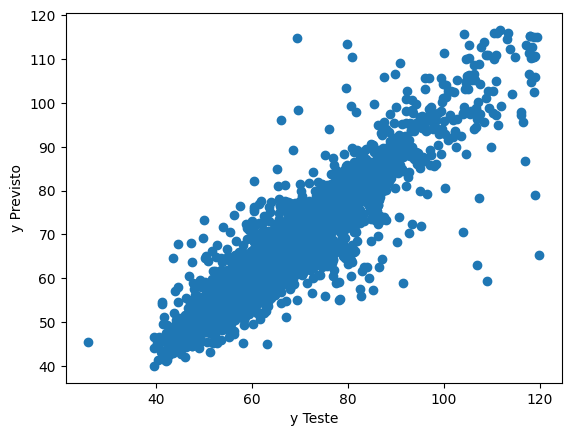

In [19]:
plt.scatter(y_teste,y_prev)
plt.xlabel('y Teste')
plt.ylabel('y Previsto')

### RandomizedSearchCV

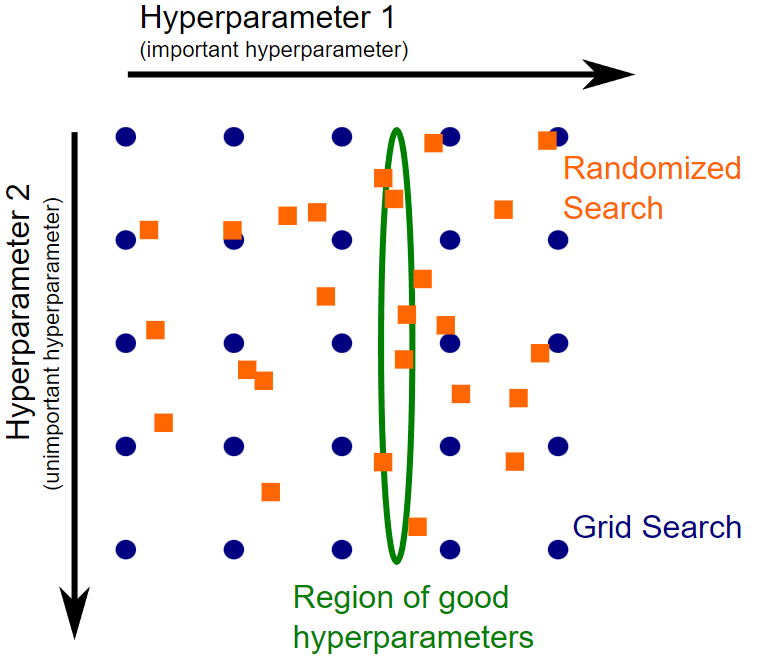

O RandomizedSearchCV é uma alternativa ao GridSearchCV. Em vez de testar todas as combinações possíveis de hiperparâmetros, ele testa um número fixo de combinações de hiperparâmetros selecionadas aleatoriamente. Isso pode ser muito mais eficiente se tivermos uma grande quantidade de hiperparâmetros ou se quisermos limitar o tempo/computação gasto na busca.

In [20]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
modelo = KNeighborsRegressor()
param_dist = {
    'n_neighbors': np.arange(1, 50),               # valores entre 1 e 50
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]
}
random_search = RandomizedSearchCV(
    modelo, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='neg_mean_absolute_percentage_error', 
    random_state=42,
    verbose=3)
random_search.fit(x_treino,y_treino)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END n_neighbors=35, p=2, weights=distance;, score=-0.050 total time=   0.5s
[CV 2/5] END n_neighbors=35, p=2, weights=distance;, score=-0.050 total time=   0.5s
[CV 3/5] END n_neighbors=35, p=2, weights=distance;, score=-0.049 total time=   0.4s
[CV 4/5] END n_neighbors=35, p=2, weights=distance;, score=-0.049 total time=   0.4s
[CV 5/5] END n_neighbors=35, p=2, weights=distance;, score=-0.051 total time=   0.4s
[CV 1/5] END n_neighbors=29, p=1, weights=distance;, score=-0.046 total time=   0.4s
[CV 2/5] END n_neighbors=29, p=1, weights=distance;, score=-0.046 total time=   0.4s
[CV 3/5] END n_neighbors=29, p=1, weights=distance;, score=-0.046 total time=   0.4s
[CV 4/5] END n_neighbors=29, p=1, weights=distance;, score=-0.046 total time=   0.5s
[CV 5/5] END n_neighbors=29, p=1, weights=distance;, score=-0.047 total time=   0.5s
[CV 1/5] END n_neighbors=5, p=1, weights=uniform;, score=-0.040 total time=   0.3s
[CV 2

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=20,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42,
                   scoring='neg_mean_absolute_percentage_error', verbose=3)

In [21]:
print("Melhores hiperparâmetros:", random_search.best_params_)
print("Melhor pontuação:", random_search.best_score_)


Melhores hiperparâmetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}
Melhor pontuação: -0.03694899833851974


In [22]:
best_model = random_search.best_estimator_
y_prev = best_model.predict(x_teste)
mape = mean_absolute_percentage_error(y_teste,y_prev)
r2 = r2_score(y_teste,y_prev)
print(f'r2_score = {r2}, mape = {mape}')

r2_score = 0.8835536615657993, mape = 0.03463326977112872


Text(0, 0.5, 'y Previsto')

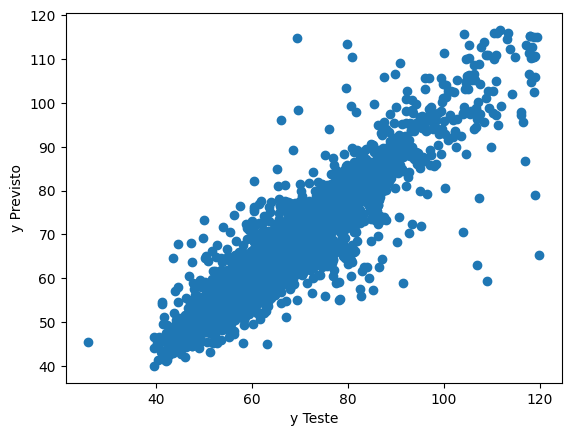

In [23]:
plt.scatter(y_teste,y_prev)
plt.xlabel('y Teste')
plt.ylabel('y Previsto')

### Otimização Bayesiana

A otimização Bayesiana é uma técnica avançada que modela a função objetivo (por exemplo, o erro de validação cruzada para um conjunto de hiperparâmetros) como um processo gaussiano. Em vez de testar hiperparâmetros ao acaso ou em uma grade, a otimização Bayesiana seleciona hiperparâmetros de forma inteligente, com base em um modelo probabilístico do desempenho esperado.

In [31]:
from skopt import BayesSearchCV
modelo = KNeighborsRegressor()
param_space = {
    'n_neighbors': (1, 50), # valores entre 1 e 50
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
opt = BayesSearchCV(
    modelo,
    param_space,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    # random_state=42,
    n_jobs=-1,
    verbose=4
)
opt.fit(x_treino,y_treino)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 4\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 4\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=20, n_jobs=-1,
              scoring='neg_mean_absolute_percentage_error',
              search_spaces={'n_neighbors': (1, 50), 'p': [1, 2],
                             'weights': ['uniform', 'distance']},
              verbose=4)

In [32]:
print("Melhores hiperparâmetros:", opt.best_params_)
print("Melhor pontuação:", opt.best_score_)

Melhores hiperparâmetros: OrderedDict([('n_neighbors', 3), ('p', 1), ('weights', 'distance')])
Melhor pontuação: -0.03694899833851974


In [33]:
best_model = opt.best_estimator_
y_prev = best_model.predict(x_teste)
mape = mean_absolute_percentage_error(y_teste,y_prev)
r2 = r2_score(y_teste,y_prev)
print(f'r2_score = {r2}, mape = {mape}')

r2_score = 0.8835536615657993, mape = 0.03463326977112872


Text(0, 0.5, 'y Previsto')

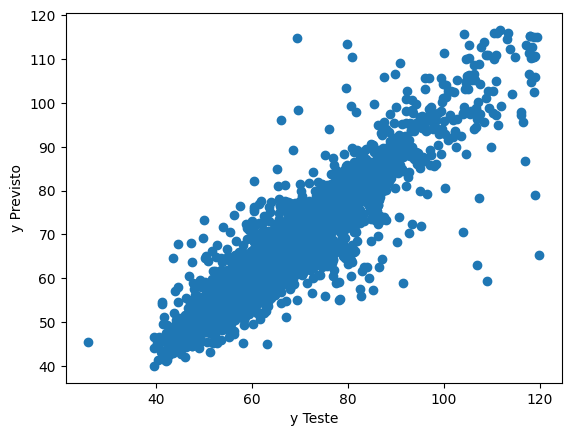

In [34]:
plt.scatter(y_teste,y_prev)
plt.xlabel('y Teste')
plt.ylabel('y Previsto')